In [2]:
# Use code from: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# to access data from Google Drive in this notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download training data
import pandas as pd
train_id = '1RU-2LylB_GyZQGEYSnJG8kKYv_z6nPDF'
downloaded = drive.CreateFile({'id':train_id}) 
downloaded.GetContentFile('mitbih_train.csv')  
train = pd.read_csv('mitbih_train.csv', header=None)
train.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Download test data
test_id = '1hx4E06B2KXFavgSoxNjX7VcVVSh0S5w0'
downloaded = drive.CreateFile({'id':test_id})
downloaded.GetContentFile('mitbih_test.csv')
test = pd.read_csv('mitbih_test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Rename final column to be label
train = train.rename(columns={187: "Label"})
test = test.rename(columns={187: "Label"})

Check how many records are within each category:

In [6]:
print('Training data: \n Count: \n',train.groupby(by='Label').count()[1],'\n\n Proportion:',train.groupby(by='Label').count()[1]/train.shape[0],'\n\n')
print('Test data: \n Count: \n',test.groupby(by='Label').count()[1], '\n\n Proportion:',test.groupby(by='Label').count()[1]/test.shape[0])

Training data: 
 Count: 
 Label
0.0    72471
1.0     2223
2.0     5788
3.0      641
4.0     6431
Name: 1, dtype: int64 

 Proportion: Label
0.0    0.827729
1.0    0.025390
2.0    0.066108
3.0    0.007321
4.0    0.073452
Name: 1, dtype: float64 


Test data: 
 Count: 
 Label
0.0    18118
1.0      556
2.0     1448
3.0      162
4.0     1608
Name: 1, dtype: int64 

 Proportion: Label
0.0    0.827608
1.0    0.025397
2.0    0.066143
3.0    0.007400
4.0    0.073451
Name: 1, dtype: float64


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to Label
dtypes: float64(188)
memory usage: 125.6 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to Label
dtypes: float64(188)
memory usage: 31.4 MB


# ALL Libraries

In [13]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# standard imports and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import *
# pipelines
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# data preparation
from sklearn.preprocessing import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.utils import resample
from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE
# machine learning
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

# Splitting Test and Train Data

In [9]:
# Separate labels from the data used to obtain the label
X_train = train.drop('Label',axis=1)
Y_train = train['Label']

X_test = test.drop('Label',axis=1)
Y_test = test['Label']

In [10]:
Y_train

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
87549    4.0
87550    4.0
87551    4.0
87552    4.0
87553    4.0
Name: Label, Length: 87554, dtype: float64

# Training Model

# Without Sampling the Unbalanced Data

# Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)

In [55]:
rf_predictions

array([0., 0., 0., ..., 4., 4., 4.])

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
accuracy_score(Y_test,rf_predictions)

0.9746025945550886

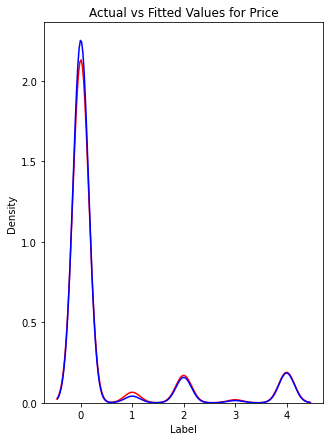

In [58]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

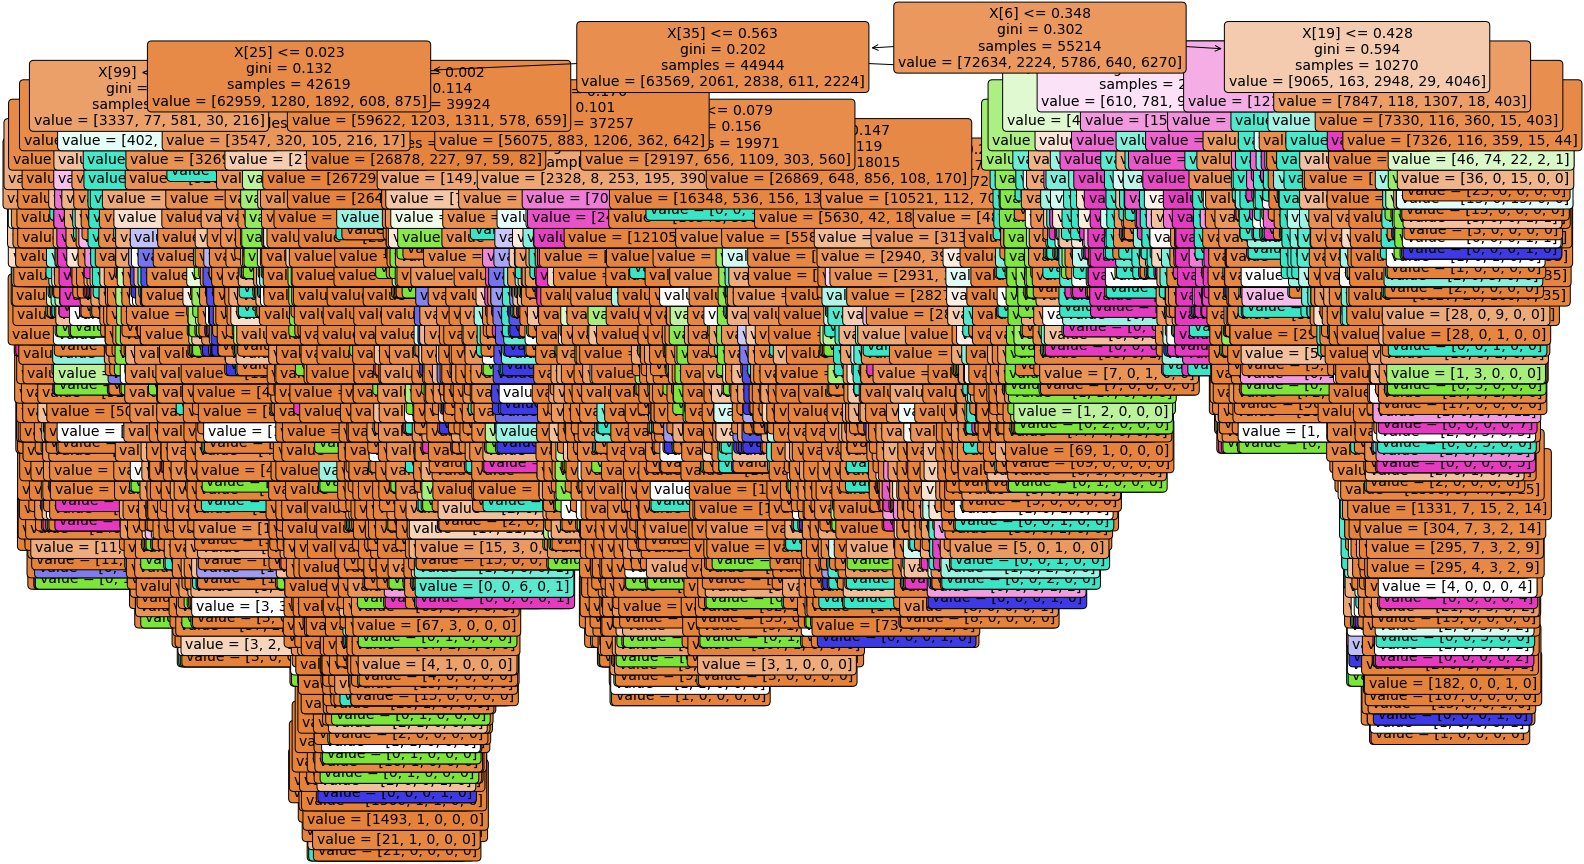

In [59]:
import pydot
# Pull out one tree from the forest
Tree = rf_classifier.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [62]:
print(classification_report(Y_test,rf_predictions)) 

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99     18118
         1.0       0.98      0.60      0.75       556
         2.0       0.98      0.88      0.93      1448
         3.0       0.88      0.63      0.73       162
         4.0       0.99      0.94      0.97      1608

    accuracy                           0.97     21892
   macro avg       0.96      0.81      0.87     21892
weighted avg       0.97      0.97      0.97     21892



# MLPC Classifier

In [60]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train, Y_train)
snn_predictions = snn_classifier.predict(X_test)

In [61]:
accuracy_score(Y_test,snn_predictions)

0.9785309702174311

In [63]:
print(classification_report(Y_test,snn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.86      0.72      0.78       556
         2.0       0.93      0.94      0.94      1448
         3.0       0.83      0.72      0.77       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.92      0.87      0.89     21892
weighted avg       0.98      0.98      0.98     21892



If we use a deep feedforward neural network instead (with 5 hidden layers of 100 nodes each) we get better results, with each class achieving an f1 score above 0.9

In [64]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(X_less_train, Y_less_train)
dnn_predictions = dnn_classifier.predict(X_test)

In [65]:
print(classification_report(Y_test,dnn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     18118
         1.0       0.21      0.78      0.33       556
         2.0       0.59      0.88      0.70      1448
         3.0       0.12      0.91      0.21       162
         4.0       0.66      0.98      0.79      1608

    accuracy                           0.79     21892
   macro avg       0.51      0.86      0.58     21892
weighted avg       0.91      0.79      0.83     21892



In [66]:
accuracy_score(Y_test , dnn_predictions)

0.790243011145624

MLPC classifier gave a slightly better accuracy than Random Forest Classifier

# Let's Deal with Unbalanced Data

In [11]:
Y_train.value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: Label, dtype: int64

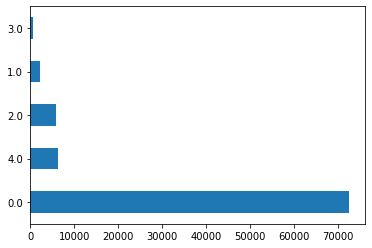

In [12]:
Y_train.value_counts().plot(kind = 'barh')

# Subsampling

In [14]:
X_less_train, Y_less_train = make_imbalance(X_train, Y_train, sampling_strategy={0: 641, 1: 641, 2: 641, 3: 641, 4:641},random_state=14)

In [15]:
X_train.shape

(87554, 187)

In [16]:
Y_train.shape

(87554,)

In [17]:
X_less_train.shape

(3205, 187)

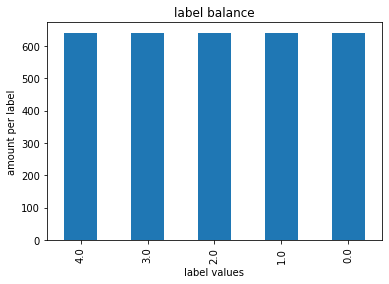

In [37]:
Y_less_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# One vs Rest All Model

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(np.array(X_less_train), Y_less_train)
dnns_predictions_labels = dnns_classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(Y_test,dnns_predictions_labels)

0.8094281015896218

In [21]:
cm = confusion_matrix(Y_test,dnns_predictions_labels)

Text(69.0, 0.5, 'Truth')

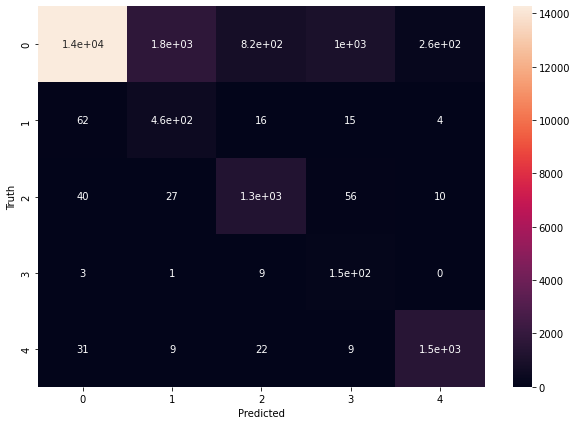

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
print(classification_report(Y_test,dnns_predictions_labels)) 

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     18118
         1.0       0.20      0.83      0.33       556
         2.0       0.60      0.91      0.73      1448
         3.0       0.12      0.92      0.21       162
         4.0       0.85      0.96      0.90      1608

    accuracy                           0.81     21892
   macro avg       0.55      0.88      0.61     21892
weighted avg       0.93      0.81      0.85     21892



# XGBoost Classifier

In [23]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(np.array(X_less_train), Y_less_train)
xbg_predictions_labels = xgb_classifier.predict(X_test.values)

In [24]:
accuracy_score(Y_test , xbg_predictions_labels)

0.8105243924721359

In [49]:
print(classification_report(Y_test,xbg_predictions_labels)) 

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88     18118
         1.0       0.24      0.77      0.36       556
         2.0       0.61      0.87      0.72      1448
         3.0       0.10      0.90      0.18       162
         4.0       0.78      0.97      0.87      1608

    accuracy                           0.81     21892
   macro avg       0.54      0.86      0.60     21892
weighted avg       0.92      0.81      0.85     21892



# SVM Model

In [25]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(X_less_train, Y_less_train)
svm_predictions_labels = svm_classifier.predict(X_test)

In [26]:
accuracy_score(Y_test , svm_predictions_labels)

0.8375205554540471

In [50]:
print(classification_report(Y_test,svm_predictions_labels)) 

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90     18118
         1.0       0.34      0.69      0.45       556
         2.0       0.64      0.85      0.73      1448
         3.0       0.09      0.89      0.16       162
         4.0       0.86      0.91      0.88      1608

    accuracy                           0.84     21892
   macro avg       0.58      0.83      0.63     21892
weighted avg       0.92      0.84      0.87     21892



# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_less_train, Y_less_train)
rf_predictions = rf_classifier.predict(X_test)

In [28]:
accuracy_score(Y_test ,rf_predictions )

0.8699524940617577

In [45]:
print(classification_report(Y_test,rf_predictions)) 

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     18118
         1.0       0.31      0.80      0.45       556
         2.0       0.73      0.89      0.80      1448
         3.0       0.13      0.90      0.23       162
         4.0       0.87      0.96      0.91      1608

    accuracy                           0.87     21892
   macro avg       0.61      0.88      0.66     21892
weighted avg       0.94      0.87      0.89     21892



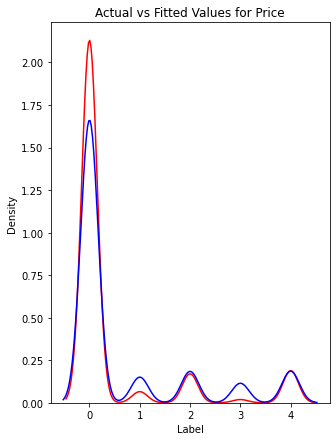

In [51]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_predictions, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

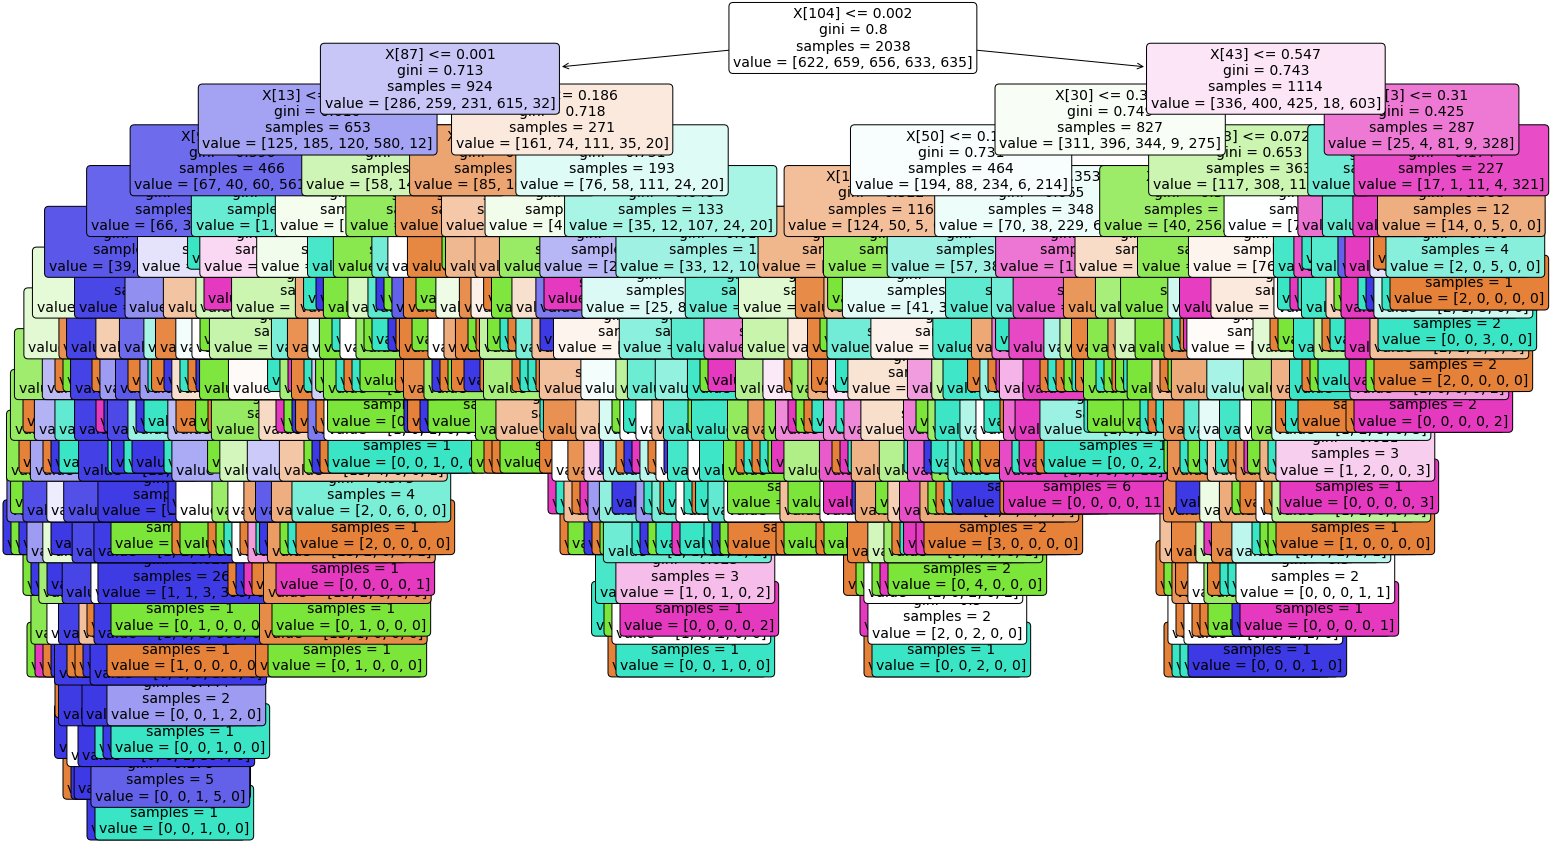

In [53]:
import pydot
# Pull out one tree from the forest
Tree = rf_classifier.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_less_train, Y_less_train)
knn_predictions = knn_classifier.predict(X_test)

In [30]:
accuracy_score(Y_test ,knn_predictions )

0.778594920518911

In [44]:
print(classification_report(Y_test,knn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86     18118
         1.0       0.18      0.78      0.29       556
         2.0       0.57      0.83      0.67      1448
         3.0       0.09      0.91      0.17       162
         4.0       0.85      0.93      0.89      1608

    accuracy                           0.78     21892
   macro avg       0.54      0.84      0.58     21892
weighted avg       0.92      0.78      0.83     21892



# MLPC Classifier

In [31]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier()
snn_classifier.fit(X_less_train, Y_less_train)
snn_predictions = snn_classifier.predict(X_test)

In [32]:
accuracy_score(Y_test ,snn_predictions )

0.7893751141969669

In [43]:
print(classification_report(Y_test,snn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.99      0.77      0.86     18118
         1.0       0.19      0.79      0.30       556
         2.0       0.62      0.86      0.72      1448
         3.0       0.11      0.90      0.19       162
         4.0       0.75      0.95      0.84      1608

    accuracy                           0.79     21892
   macro avg       0.53      0.85      0.58     21892
weighted avg       0.92      0.79      0.83     21892



If we use a deep feedforward neural network instead (with 5 hidden layers of 100 nodes each) we get better results, with each class achieving an f1 score above 0.9. However it still isnt as good as the previous two models (achieving perfect f1 scores for each class!)

In [34]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(X_less_train, Y_less_train)
dnn_predictions = dnn_classifier.predict(X_test)

In [35]:
accuracy_score(Y_test ,dnn_predictions )

0.7736616115475973

In [42]:
print(classification_report(Y_test,dnn_predictions)) 

              precision    recall  f1-score   support

         0.0       0.99      0.75      0.85     18118
         1.0       0.15      0.82      0.25       556
         2.0       0.65      0.85      0.74      1448
         3.0       0.11      0.93      0.20       162
         4.0       0.79      0.97      0.87      1608

    accuracy                           0.77     21892
   macro avg       0.54      0.87      0.58     21892
weighted avg       0.93      0.77      0.83     21892

